use T4 GPU runtime

In [1]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=f996890f2d184af2d7d738afe12918e1b63eef8e917fe8dcb52ba4fc5c67afdd
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


### This demo shows how to detect faces from video and displays result in realtime

You need OpenCV installed to run this example. To install it, run ___pip install opencv-python___


In [2]:
%pylab inline
import face_recognition
import cv2
import matplotlib.patches as patches
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

Populating the interactive namespace from numpy and matplotlib


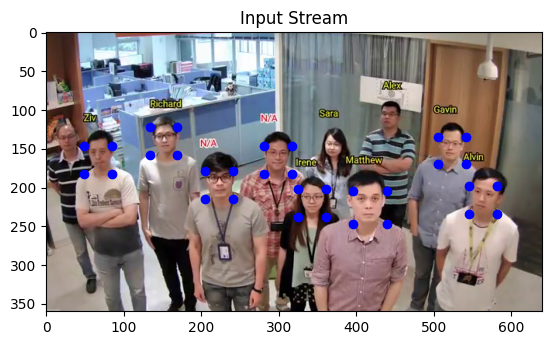

In [4]:
# Loading video for face detection
video_capture = cv2.VideoCapture("/content/facerec.mp4")
frame_count = 0

while video_capture.isOpened():
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Bail out when the video file ends
    if not ret:
        video_capture.release()
        break

    # We will search face in every 15 frames to speed up process.
    frame_count += 1
    if frame_count % 15 == 0:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display video frame
        title("Input Stream")
        plt.imshow(frame)

        # Find all the faces and face encodings in the current frame of video
        rgb_frame = frame[:, :, ::-1]
        face_locations = face_recognition.face_locations(rgb_frame)

        # If faces were found, we will mark it on frame with blue dots
        for face_location in face_locations:
            plt.plot(face_location[1], face_location[0], 'bo')
            plt.plot(face_location[1], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[0], 'bo')

        # Show frame...
        plt.show()
        # ... and hold it until a new frame appears
        clear_output(wait=True)

In [5]:
face_locations

[(204, 439, 247, 395),
 (202, 361, 238, 325),
 (146, 317, 182, 281),
 (134, 541, 170, 505),
 (198, 581, 234, 545),
 (178, 241, 214, 205),
 (146, 85, 182, 49),
 (122, 169, 158, 133)]

Saving peoole.jpg to peoole.jpg


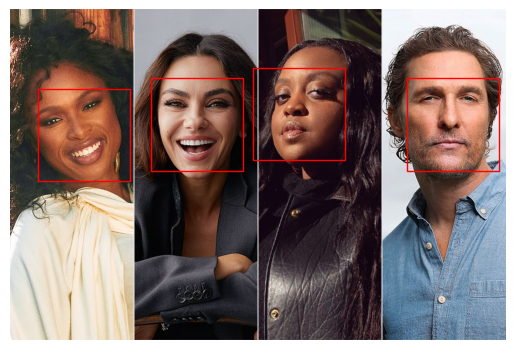

In [7]:
from google.colab import files
import face_recognition
import matplotlib.pyplot as plt

# Upload the image(s)
uploaded = files.upload()

# Load the uploaded image
image_path = next(iter(uploaded))
image = face_recognition.load_image_file(image_path)

# Find faces in the image
face_locations = face_recognition.face_locations(image)
face_encodings = face_recognition.face_encodings(image, face_locations)

# Load known faces if needed
# known_face_encodings = [...]

# Compare faces if needed
# results = face_recognition.compare_faces(known_face_encodings, face_encodings)

# Display the image with bounding boxes around the detected faces
plt.imshow(image)
ax = plt.gca()

for face_location in face_locations:
    top, right, bottom, left = face_location
    x, y, w, h = left, top, right - left, bottom - top
    rect = plt.Rectangle((x, y), w, h, fill=False, color='red')
    ax.add_patch(rect)

plt.axis('off')
plt.show()


Upload Known File


Saving che.jpg to che (1).jpg


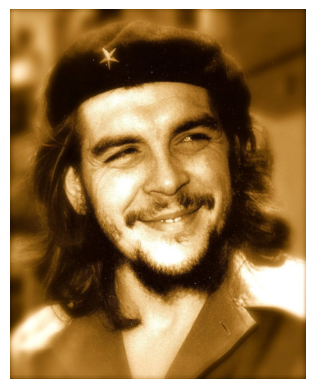

Upload Unknown File


Saving che2.jpeg to che2.jpeg


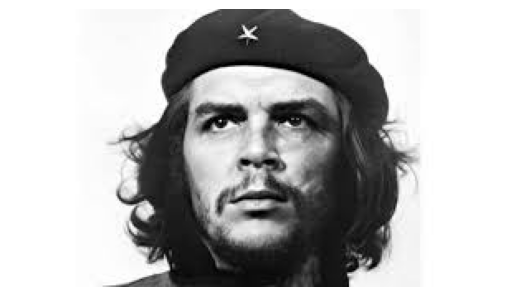

[True]


In [9]:
from google.colab import files
import face_recognition
import matplotlib.pyplot as plt
import face_recognition

print("Upload Known File")
# Upload the image(s)
uploaded1 = files.upload()

image_path1 = next(iter(uploaded1))
known_image= face_recognition.load_image_file(image_path1)

plt.imshow(known_image)
plt.axis('off')
plt.show()

print("Upload Unknown File")
uploaded2 = files.upload()
image_path2 = next(iter(uploaded2))
unknown_image = face_recognition.load_image_file(image_path2)

plt.imshow(unknown_image)
plt.axis('off')
plt.show()

known_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

results = face_recognition.compare_faces([known_encoding], unknown_encoding)

print(results)

[{'chin': [(104, 74), (104, 87), (106, 99), (109, 111), (111, 123), (117, 133), (125, 141), (136, 147), (149, 149), (162, 147), (175, 143), (186, 136), (194, 126), (198, 113), (201, 101), (202, 88), (203, 75)], 'left_eyebrow': [(109, 68), (114, 60), (122, 57), (132, 57), (142, 59)], 'right_eyebrow': [(156, 58), (167, 55), (178, 54), (188, 57), (195, 65)], 'nose_bridge': [(150, 66), (149, 72), (149, 78), (149, 85)], 'nose_tip': [(139, 95), (144, 96), (149, 96), (154, 96), (159, 95)], 'left_eye': [(119, 72), (124, 67), (131, 67), (137, 70), (131, 72), (124, 73)], 'right_eye': [(163, 70), (169, 66), (176, 66), (182, 70), (176, 72), (169, 71)], 'top_lip': [(131, 117), (138, 112), (144, 109), (148, 109), (152, 108), (159, 111), (167, 116), (164, 116), (152, 114), (148, 114), (144, 114), (135, 117)], 'bottom_lip': [(167, 116), (160, 120), (153, 122), (149, 122), (144, 122), (138, 121), (131, 117), (135, 117), (145, 115), (149, 115), (153, 115), (164, 116)]}]


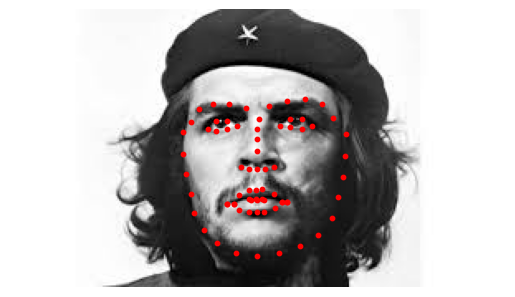

In [15]:
# Get face landmarks
face_landmarks_list = face_recognition.face_landmarks(unknown_image)
print(face_landmarks_list)

# Plot the image
plt.imshow(unknown_image)
plt.axis('off')

# Plot face landmarks
for face_landmarks in face_landmarks_list:
    for facial_feature in face_landmarks.keys():
        landmarks = face_landmarks[facial_feature]
        for landmark in landmarks:
            plt.scatter(landmark[0], landmark[1], color='red', s=10)

plt.show()
